In [357]:
# A pre-saved dataset on seaborn

import seaborn as sns
sns.set_theme()
df = sns.load_dataset("penguins")
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


## 2. Understand the Data

Let us first understand the dataset and check its summary.

In [360]:
import pandas as pd
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [362]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [364]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [366]:
corr = df.corr(numeric_only=True)

corr

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


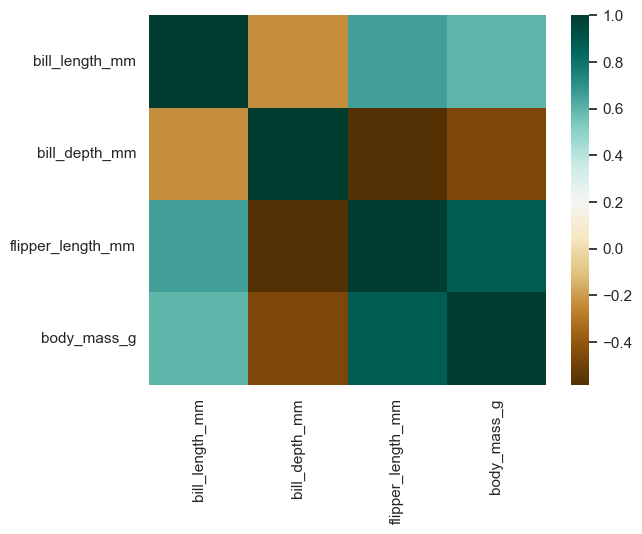

In [368]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

corr = df.corr(numeric_only = True)
sns.heatmap(corr, cmap = "BrBG")
plt.show()

In [369]:
df.isnull().values.any()

True

In [372]:
df.isnull().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

## 3. Missing value Treatment

In [375]:
# use isnull() to check for missing values
# sum(): gives the sum of missing values in each column
missing_values = df.isnull().sum()

# print the missing values
missing_values

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
##### From the df.head() output, we can notice that a row is completely empty.
##### So, let's try to drop rows that have empty values and run check the missing values again.

df_dropped = df.dropna()

df_dropped.isnull().values.any()

##### We notice that there are no missing values in the dataset now.
##### Since, exact values of the numeric columns is essential for analysis and many rows were not dropped from the dataset,
##### we are continuing with the dropped DataFrame.

df = df_dropped

# 4. Handle Non-Numeric Data

## 4.1 One-Hot Encoding (Using Pandas)

It is used to create dummy variables from a single categorical variable. We can create a dummy variable corresponding to each level of the categorical variable. The dummy variable contains values as '0' and '1' based on the presence or absence of the category in the corresponding observation.

In [388]:
# check the categories of the variable 'species'
print('Categories in Species:', df.species.unique())

Categories in Species: ['Adelie' 'Chinstrap' 'Gentoo']


In [390]:
# create dummy variables for 'species'
pd.get_dummies(df, columns= ['species']).head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo
0,Torgersen,39.1,18.7,181.0,3750.0,Male,True,False,False
1,Torgersen,39.5,17.4,186.0,3800.0,Female,True,False,False
2,Torgersen,40.3,18.0,195.0,3250.0,Female,True,False,False
4,Torgersen,36.7,19.3,193.0,3450.0,Female,True,False,False
5,Torgersen,39.3,20.6,190.0,3650.0,Male,True,False,False


#### We can also create n-1 dummy variables for the 3 categories using the `drop_first` parameter.

In [393]:
# 'drop_first = True' creates (n-1 = 2) dummy variables from (n = 3) categories 
df = pd.get_dummies(df, columns= ['species'], drop_first = True).head()

In [395]:
df

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Chinstrap,species_Gentoo
0,Torgersen,39.1,18.7,181.0,3750.0,Male,False,False
1,Torgersen,39.5,17.4,186.0,3800.0,Female,False,False
2,Torgersen,40.3,18.0,195.0,3250.0,Female,False,False
4,Torgersen,36.7,19.3,193.0,3450.0,Female,False,False
5,Torgersen,39.3,20.6,190.0,3650.0,Male,False,False


The above data frame contains 15 dummy variables for 3 categories of `species`. 
The 'False' indicates non-existance of the item type while 'True' indicates existance of the item type.

## 4.2 Label Encoding (Using Sklearn)

This technique labels each of the categories of the variable with values between 0 and (n-1), where 'n' is the number of distinct categories in the variable.

In [400]:
# check the categories of the variable 'island'
print('Categories in Island:', df.island.unique())

Categories in Island: ['Torgersen']


In [402]:
# import the LabelEncoder
from sklearn.preprocessing import LabelEncoder

# instantiate the encoder
labelencoder = LabelEncoder()

# fit the encoder on 'Outlet_Size' 
df['island'] = labelencoder.fit_transform(df.island)

# display the feature
df['island']

0    0
1    0
2    0
4    0
5    0
Name: island, dtype: int32

LabelEncoder has encoded the 3 island types.

## 5. Scale the data using StandardScaler

In [406]:
# calculate the minimum and maximum values of the variable
print(" The minimum value of the sales:",df['body_mass_g'].min(),"\n",
      "The maximum value of the sales:", df['body_mass_g'].max())

 The minimum value of the sales: 3250.0 
 The maximum value of the sales: 3800.0


In [408]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler

# instantiate the standardscaler
standard_scale = StandardScaler()

# fit the StandardScaler
df['Scaled_body_mass'] = standard_scale.fit_transform(df[['body_mass_g']])

# calculate the minimum and maximum values of the variable
print(" The minimum value of the sales:",df['Scaled_body_mass'].min(),"\n",
      "The maximum value of the sales:", df['Scaled_body_mass'].max())

 The minimum value of the sales: -1.6179581148900182 
 The maximum value of the sales: 1.0786387432600122


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


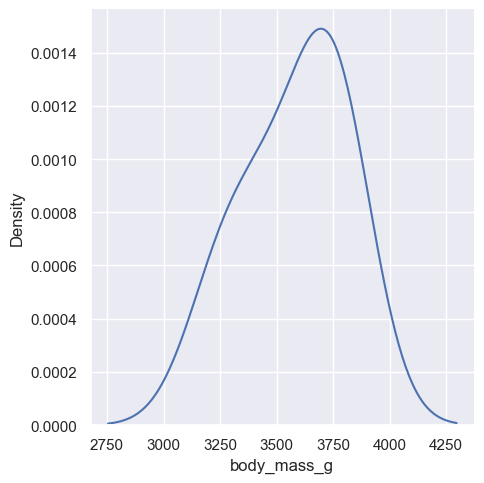

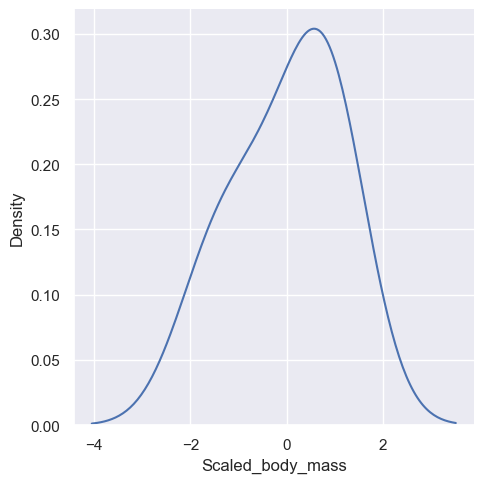

In [410]:
# plot the distribution of original variable
# axlabel: label the x-axis

sns.displot(df['body_mass_g'], kind="kde")

# set label for y-axis
axes[0].set_ylabel('Density', fontsize=15)
# set label for x-axis
axes[0].set_xlabel('body_mass_g', fontsize=15)

# plot the distribution of scaled variable
# axlabel: label the x-axis
sns.displot(df['Scaled_body_mass'], kind="kde")

# set label for y-axis
axes[1].set_ylabel('Density', fontsize=15)
# set label for x-axis
axes[1].set_xlabel('Scaled_body_mass', fontsize=15)
# display the plot
plt.show()

In [411]:
# calculate the minimum and maximum values of the variable
print(" The minimum value of the sales:",df['flipper_length_mm'].min(),"\n",
      "The maximum value of the sales:", df['flipper_length_mm'].max())

 The minimum value of the sales: 181.0 
 The maximum value of the sales: 195.0


In [412]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler

# instantiate the standardscaler
standard_scale = StandardScaler()

# fit the StandardScaler
df['Scaled_flipper_length'] = standard_scale.fit_transform(df[['flipper_length_mm']])

# calculate the minimum and maximum values of the variable
print(" The minimum value of the sales:",df['Scaled_flipper_length'].min(),"\n",
      "The maximum value of the sales:", df['Scaled_flipper_length'].max())

 The minimum value of the sales: -1.5936381457791915 
 The maximum value of the sales: 1.1952286093343936


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


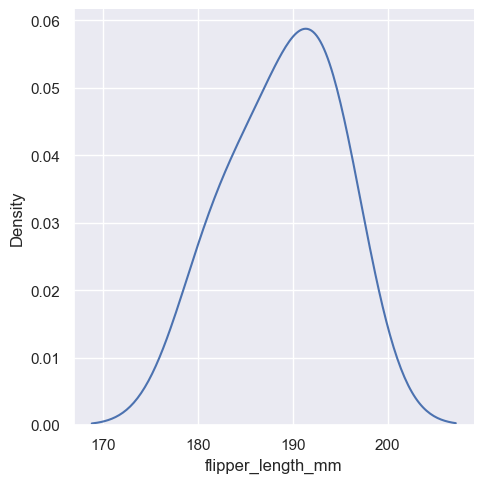

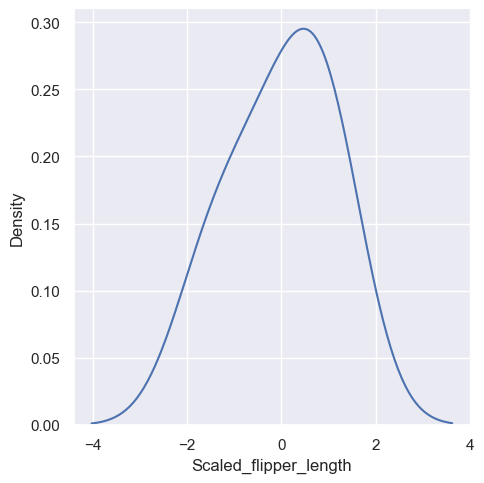

In [413]:
# plot the distribution of original variable
# axlabel: label the x-axis

sns.displot(df['flipper_length_mm'], kind="kde")

# set label for y-axis
axes[0].set_ylabel('Density', fontsize=15)
# set label for x-axis
axes[0].set_xlabel('flipper_length_mm', fontsize=15)

# plot the distribution of scaled variable
# axlabel: label the x-axis
sns.displot(df['Scaled_flipper_length'], kind="kde")

# set label for y-axis
axes[1].set_ylabel('Density', fontsize=15)
# set label for x-axis
axes[1].set_xlabel('Scaled_flipper_length', fontsize=15)
# display the plot
plt.show()

# 6. Outliers

## 6.1 Based on Boxplots:

In [420]:
# filter the numeric variables from the data
df_num = df.select_dtypes(include = "float64")

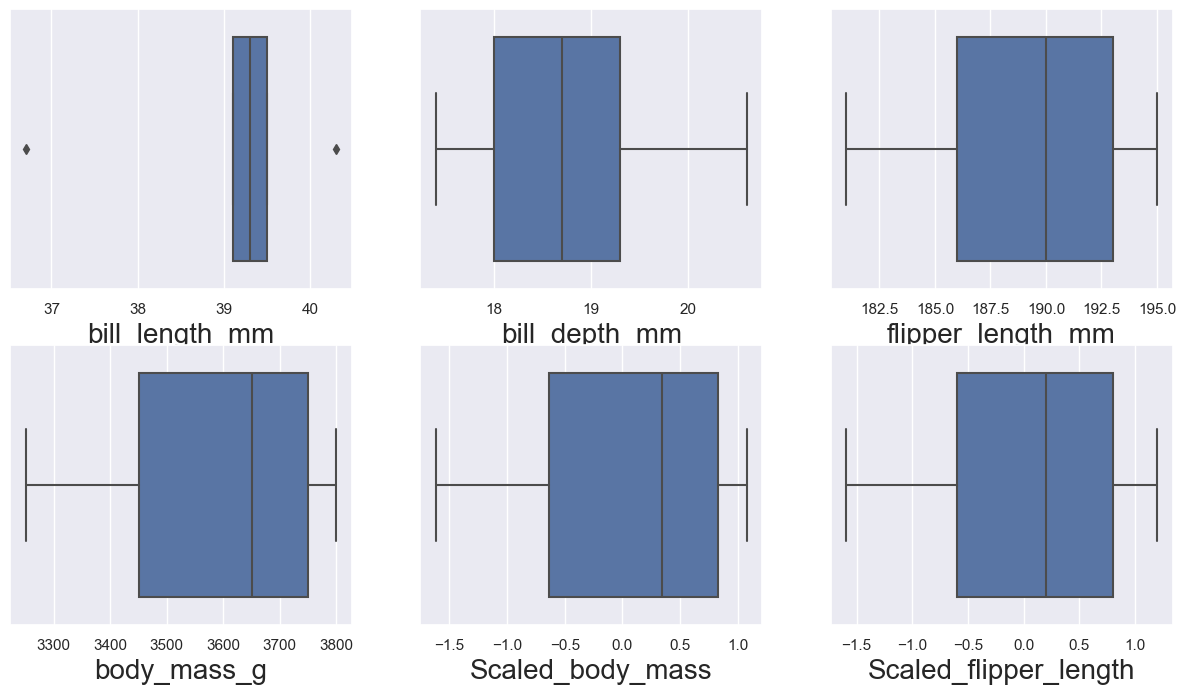

In [422]:
# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot onto
# set_xlabel(): set the x-axis label
# fontsize: sets the font size of the x-axis label
for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)                                     # set the x-axis label

**Interpretation:** Out of the six numeric variables, we notice that the variable `bill_length_mm` has outliers.

## 6.2. Based on IQR

In [425]:
# obtain the first quartile
Q1 = df_num.quantile(0.25)

# obtain the third quartile
Q3 = df_num.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

bill_length_mm             0.400000
bill_depth_mm              1.300000
flipper_length_mm          7.000000
body_mass_g              300.000000
Scaled_body_mass           1.470871
Scaled_flipper_length      1.394433
dtype: float64


In [426]:
# filter out the outlier values
# ~ : selects all rows which do not satisfy the condition
# any() : returns whether any element is True over the columns
# axis : "1" indicates columns should be altered (0 for 'index')
df_iqr = df[~((df_num < (Q1 - 1.5 * IQR)) |(df_num > (Q3 + 1.5 * IQR))).any(axis=1)]

In [427]:
# check the shape of the data
df_iqr.shape

(3, 10)

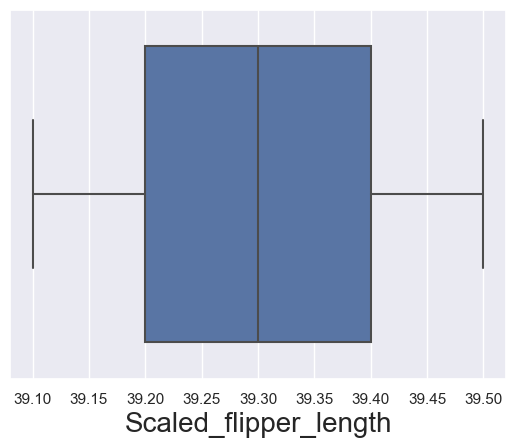

In [428]:
# plot the boxplot for the variable
# figsize(): set the figure size

# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers

z = sns.boxplot(x=df_iqr['bill_length_mm'], orient = "h",whis=1.5)
z.set_xlabel(variable, fontsize = 20)
plt.show()

**Interpretation:** The outliers have been removed and the data can be used for analysis.

# 7. Train and Test split

In [431]:
#import the sklearn library
import sklearn

# import the train_test_split module from sklearn 
from sklearn.model_selection import train_test_split

In [437]:
# select the target variable
Y = df['sex']

# select all the independent variables
# by dropping the target variable
X = df.drop(['sex'], axis = 1)

In [440]:
# let us now split the dataset into train & test
# test_size: the proportion of data to be included in the testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=100)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("Y_train ",Y_train.shape)

# print the shape of 'y_test'
print("Y_test ",Y_test.shape)

X_train  (3, 9)
X_test  (2, 9)
Y_train  (3,)
Y_test  (2,)


Thus we get our train and test split. Also ensured that the train test split are passed in the order - X_train, X_test, Y_train, Y_test - to get the correct split.